<a href="https://colab.research.google.com/github/dayudyah20/Belajar-Coursera/blob/main/Simulasi_Semhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Coba Normal

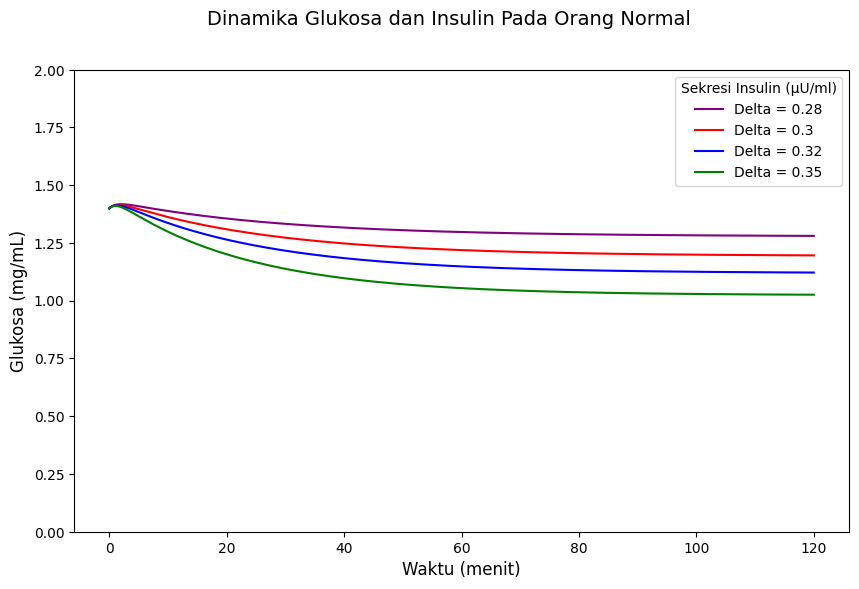

In [ ]:
#fix 1 Normal

import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 4.5
gamma = 0.0002
theta = 0.00075
beta = 0.006

# Rentang waktu simulasi
t = np.linspace(0, 120, 3000)

# Variasi delta yang ingin diuji
delta_list = [0.28, 0.3, 0.32, 0.35 ]
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [140.0, 20.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Sekresi Insulin (μU/ml)", fontsize=10)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()

coba-coba

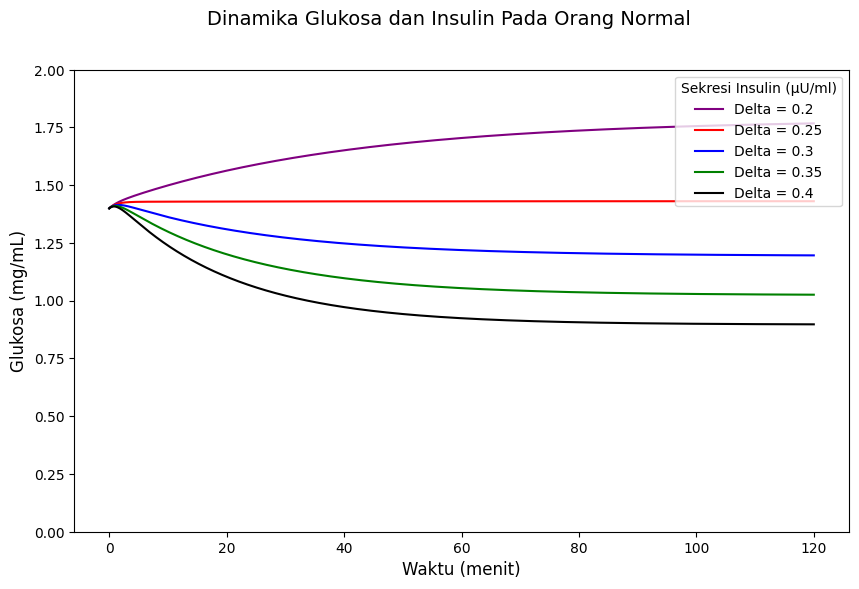

In [1]:
#fix 1 Normal

import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 4.5
gamma = 0.0002
theta = 0.00075
beta = 0.006

# Rentang waktu simulasi
t = np.linspace(0, 120, 3000)

# Variasi delta yang ingin diuji
delta_list = [0.2, 0.25, 0.3, 0.35, 0.4 ]
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [140.0, 20.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Sekresi Insulin (μU/ml)", fontsize=10)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()

##Model Injeksi Insulin

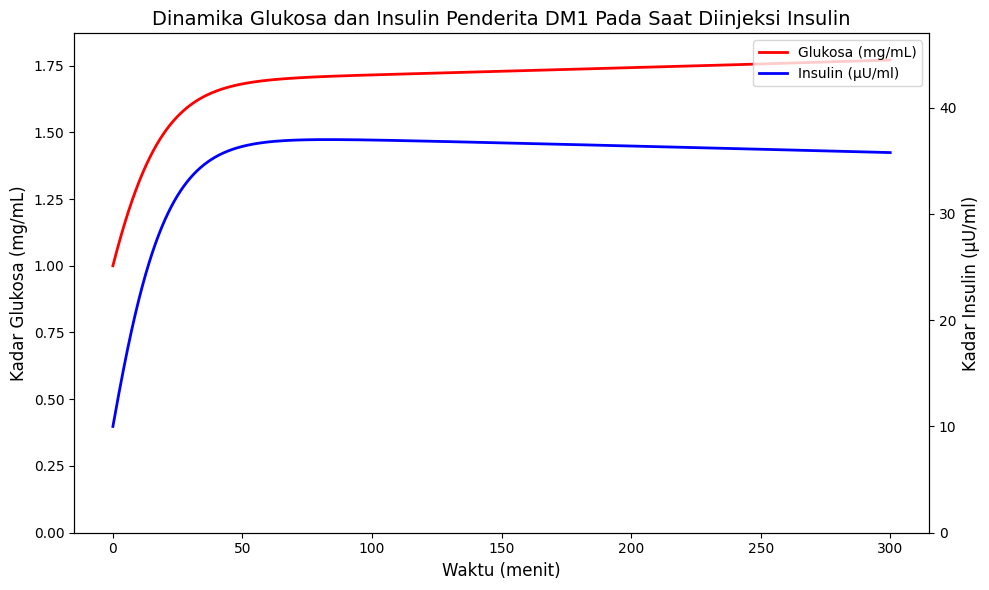

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5               # mg/dL*min, laju pemasukan glukosa
gamma = 0.0002            # 1/min, penggunaan basal
theta = 0.0007     # 1/(μU×mL×min), sensitivitas insulin
sigma = 1.0           # μU/(mL×min), efektivitas insulin injeksi
beta = 0.0003      # μU/(mL×min×mg), clearance insulin
epsilon = 0.5        # mL/μU, kejenuhan respons


t = np.linspace(0, 300, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

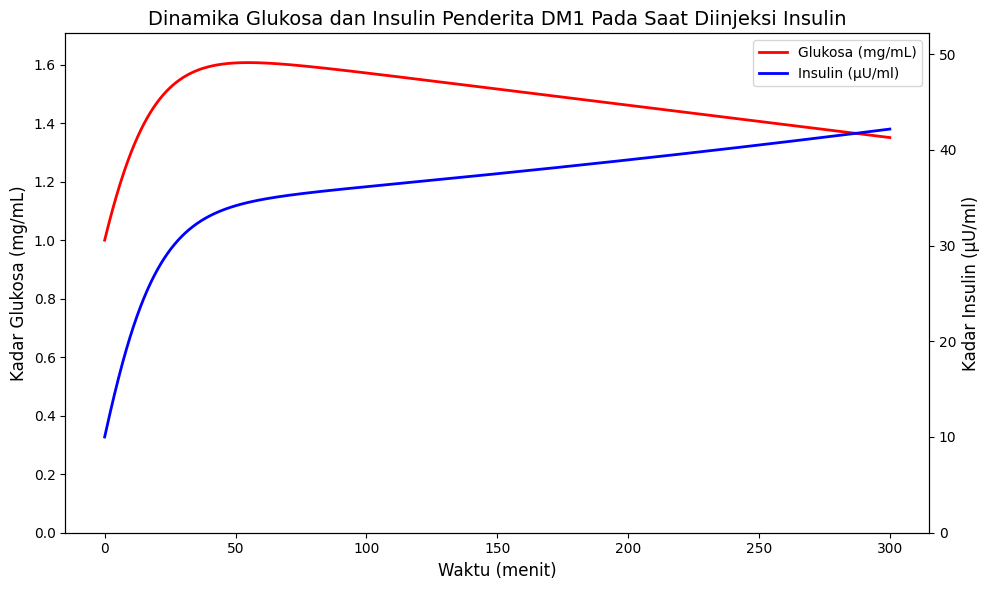

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5               # mg/dL*min, laju pemasukan glukosa
gamma = 0.0004            # naikkan sedikit
theta = 0.0008            # naikkan sedikit
sigma = 1.0               # tetap
beta = 0.0003             # tetap
epsilon = 0.55             # tetap

t = np.linspace(0, 300, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

In [3]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = 330.4597701149428
I (Insulin) = 16.521739130434767
Nilai Lambda 1 (λ₁): -0.051463496482490385
Nilai Lambda 2 (λ₂): -0.051463496486542394


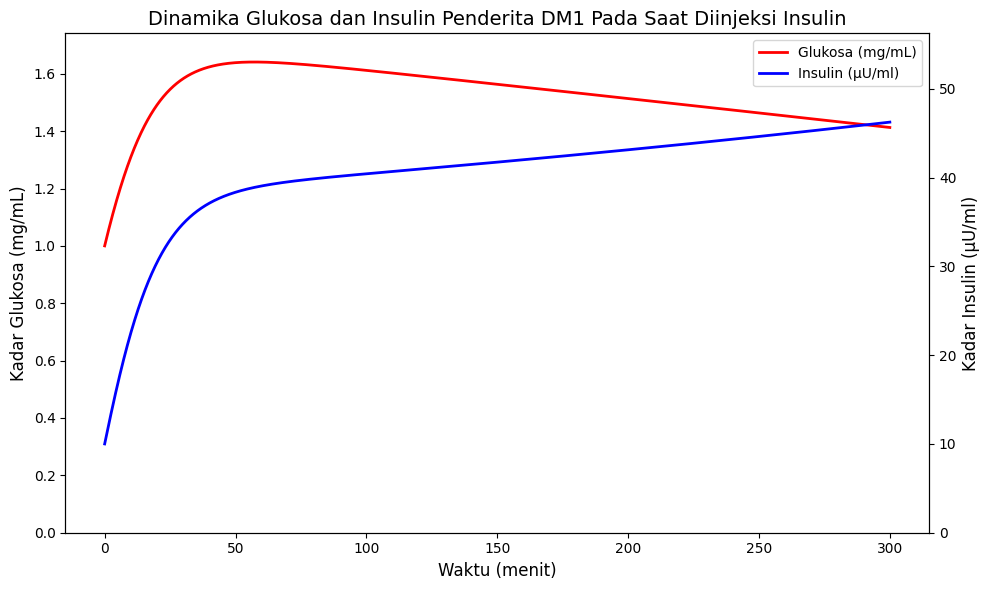

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5              # mg/dL*min, laju pemasukan glukosa
gamma = 0.0002            # naikkan sedikit
theta = 0.0007            # naikkan sedikit
sigma = 1.0               # tetap
beta = 0.0003             # tetap
epsilon = 0.48             # tetap

t = np.linspace(0, 300, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

In [9]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = 286.97571743929404
I (Insulin) = 22.11538461538458
Nilai Lambda 1 (λ₁): -0.047180764421458375
Nilai Lambda 2 (λ₂): -0.04718076442511728


coba injeksi insulin

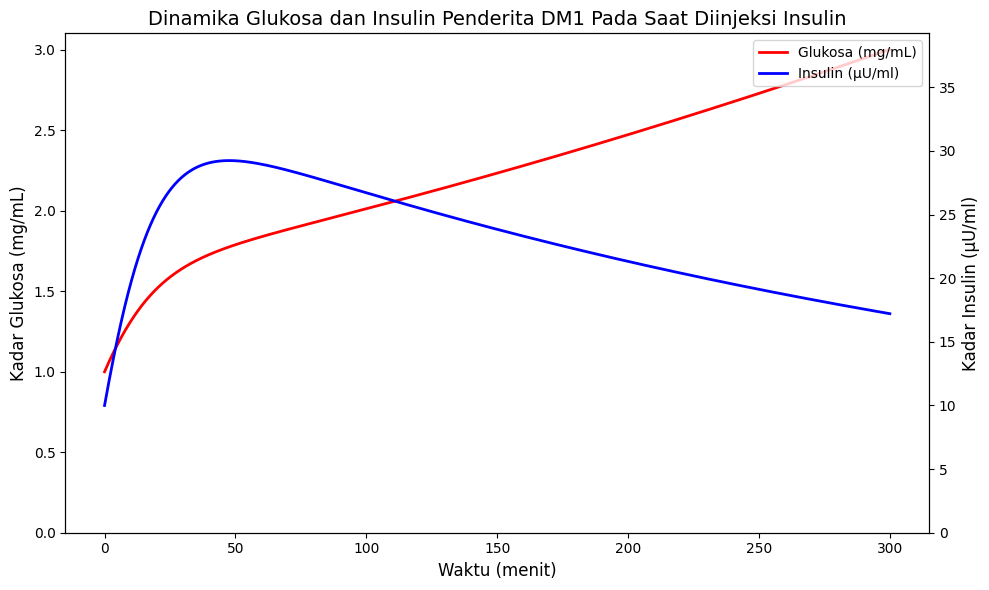

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5              # mg/dL*min, laju pemasukan glukosa
gamma = 0.0002            # naikkan sedikit
theta = 0.00075            # naikkan sedikit
sigma = 1.3               # tetap
beta = 0.0003             # tetap
epsilon = 0.8             # tetap

t = np.linspace(0, 300, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

mendekati

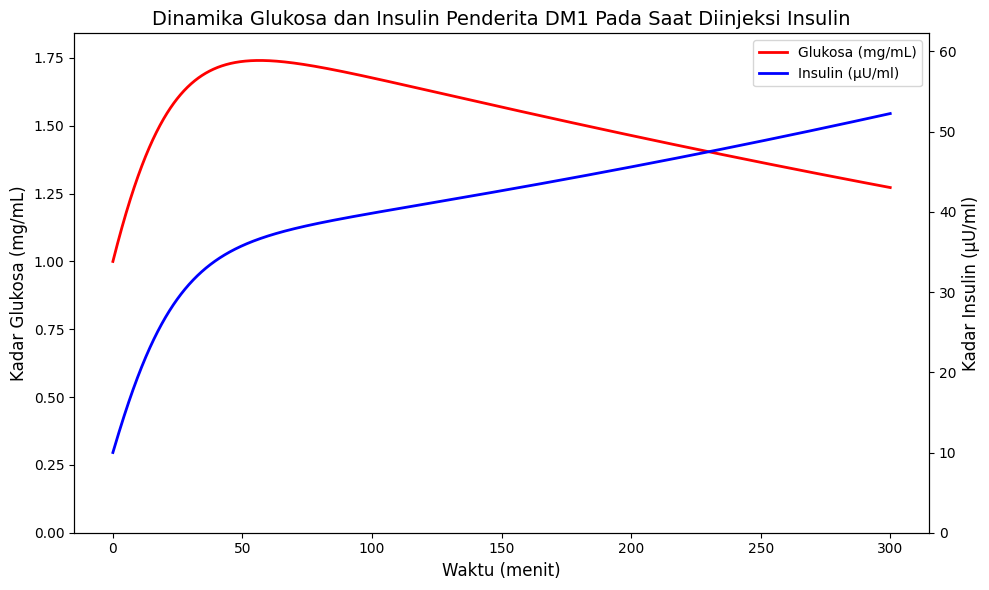

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5
gamma = 0.0002
theta = 0.0007
sigma = 1.4
beta = 0.0002
epsilon = 0.98

# Parameter
#alpha = 18.2
#gamma = 0.08
#theta = 0.0009
#sigma = 1.54
#beta = 0.0002
#epsilon = 0.98

t = np.linspace(0, 300, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

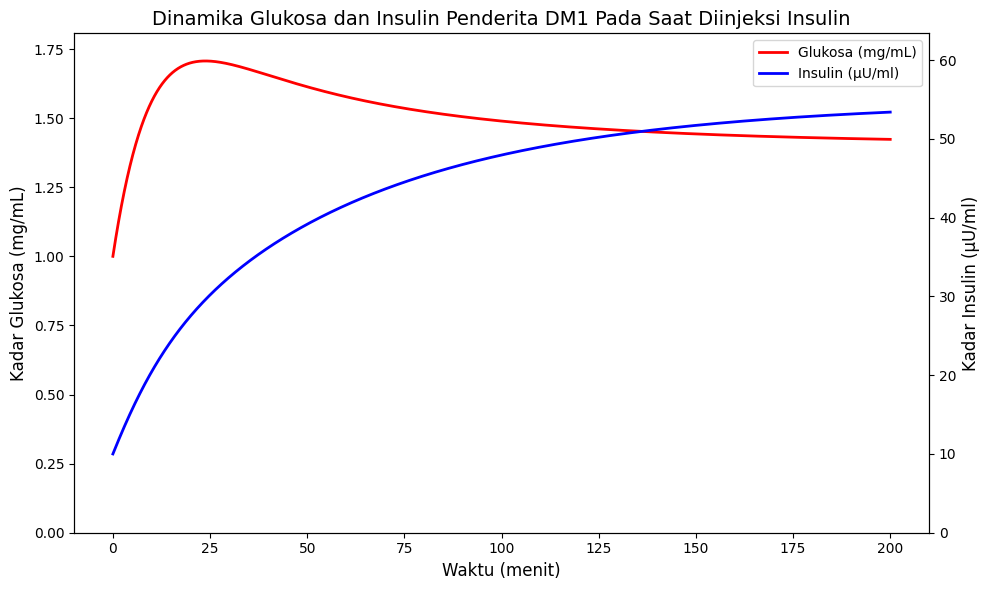

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 18.2
gamma = 0.08
theta = 0.0009
sigma = 1.54
beta = 0.0002
epsilon = 0.98

t = np.linspace(0, 200, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()


In [7]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = 140.7225806451613
I (Insulin) = 54.813863928112966
Nilai Lambda 1 (λ₁): -0.07847877325521162
Nilai Lambda 2 (λ₂): -0.07848386080643575


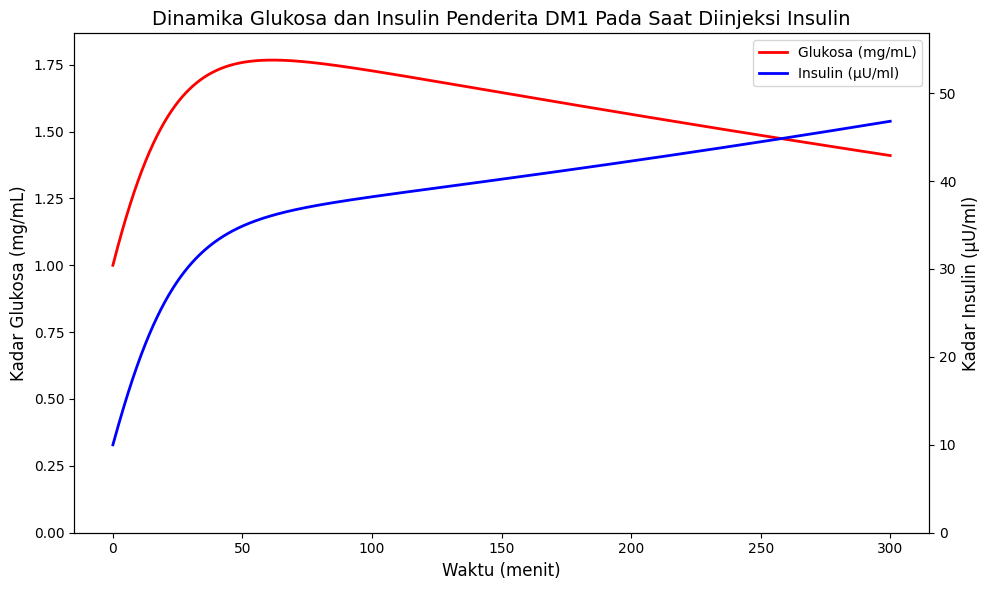

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5
gamma = 0.0002
theta = 0.0007
sigma = 1.37
beta = 0.0002
epsilon = 0.98

# Parameter
#alpha = 18.2
#gamma = 0.08
#theta = 0.0009
#sigma = 1.54
#beta = 0.0002
#epsilon = 0.98

t = np.linspace(0, 300, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

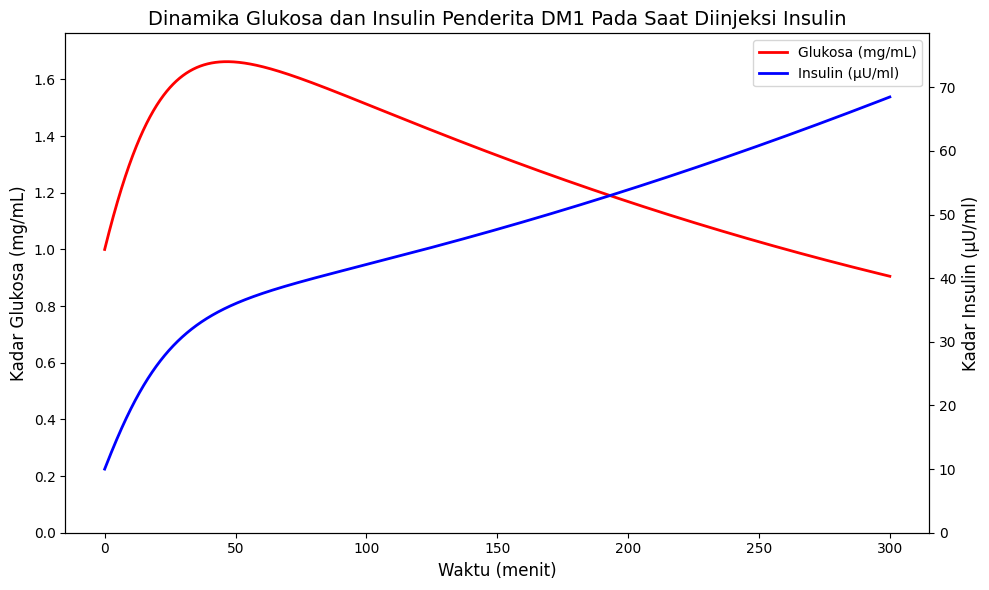

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5
gamma = 0.0002
theta = 0.000759
sigma = 1.0
beta = 0.0002
epsilon = 0.7

# Parameter
#alpha = 18.2
#gamma = 0.08
#theta = 0.0009
#sigma = 1.54
#beta = 0.0002
#epsilon = 0.98

t = np.linspace(0, 300, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

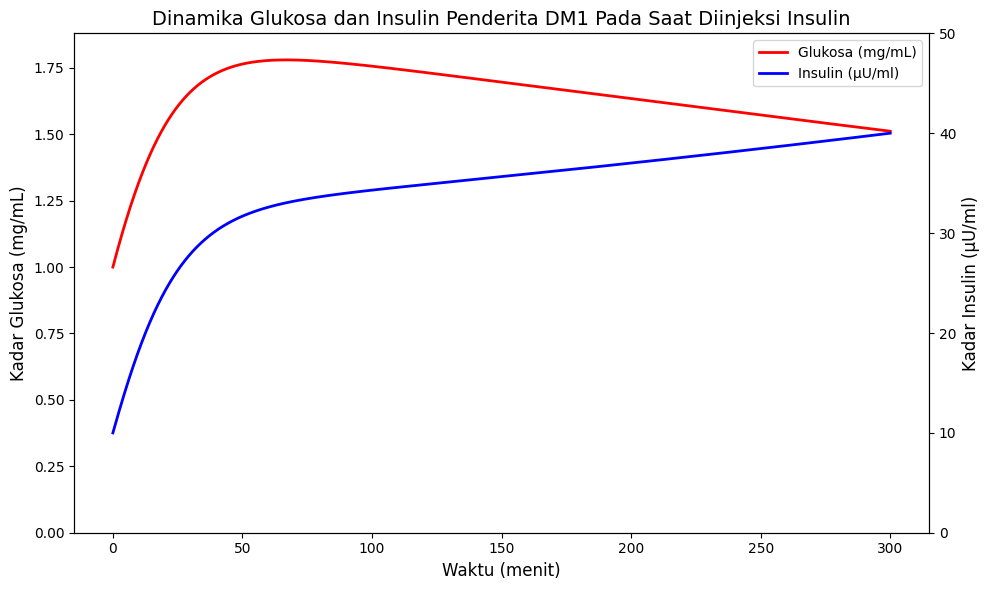

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5
gamma = 0.0002
theta = 0.000759
sigma = 0.9
beta = 0.0002
epsilon = 0.7

# Parameter
#alpha = 18.2
#gamma = 0.08
#theta = 0.0009
#sigma = 1.54
#beta = 0.0002
#epsilon = 0.98

t = np.linspace(0, 300, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

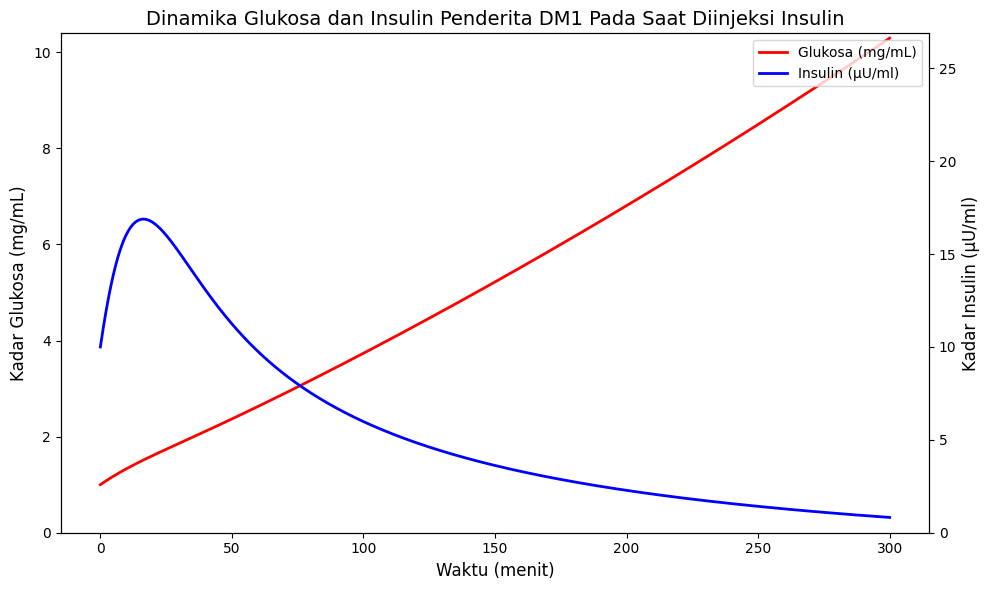

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5
gamma = 0.0002
theta = 0.0007
sigma = 1.0     # ↓↓↓
beta = 0.0007    # ↑↑↑
epsilon = 2.0   # ↑↑
epsilon = 0.5
# Parameter
#alpha = 18.2
#gamma = 0.08
#theta = 0.0009
#sigma = 1.54
#beta = 0.0002
#epsilon = 0.98

#alpha = 4.5–10

#gamma = 0.0002

#theta = 0.0009

#sigma = 1.0–1.5

#beta = 0.0004–0.0008

#epsilon = 0.7–1.0

t = np.linspace(0, 300, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

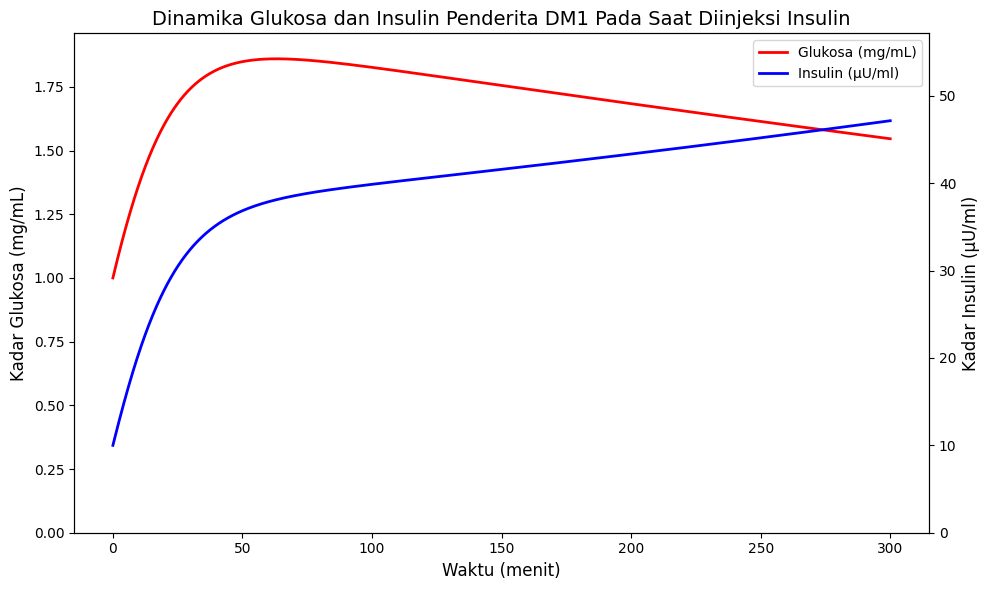

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 5
gamma = 0.0002
theta = 0.0007
sigma = 1.5
beta = 0.0002
epsilon = 0.98

# Parameter
#alpha = 5
#gamma = 0.0002
#theta = 0.0007
#sigma = 1.5
#beta = 0.0002
#epsilon = 0.98

t = np.linspace(0, 300, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

In [22]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = 694.4444444444441
I (Insulin) = 10.000000000000005
Nilai Lambda 1 (λ₁): -0.06661440328860176
Nilai Lambda 2 (λ₂): -0.06661440329576034


##ANALISIS SENSITIFITAS

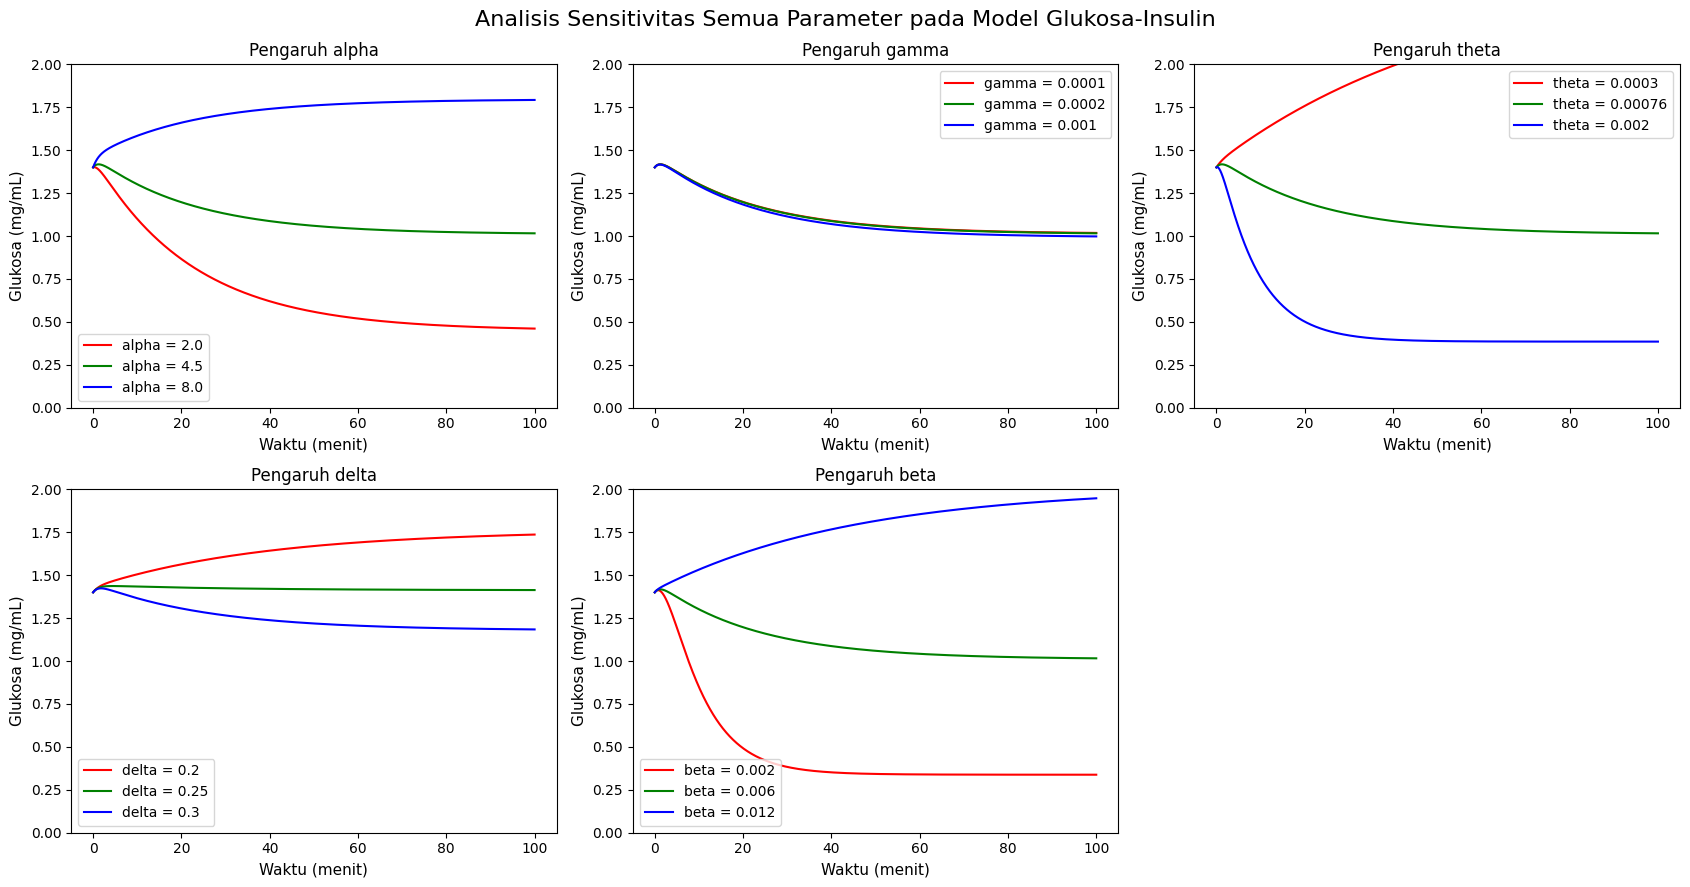

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin (sesuai rumus Anda)
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan glukosa
    dIdt = delta * G - beta * I * G               # perubahan insulin
    return np.array([dGdt, dIdt])

# Runge-Kutta Orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter dasar (default fisiologis)
alpha = 4.5
gamma = 0.0002
theta = 0.00076
delta = 0.35
beta = 0.006

# Rentang waktu simulasi
t = np.linspace(0, 100, 3000)
z0 = [140.0, 10.0]  # Glukosa (mg/dL), Insulin (μU/ml)

# List variasi parameter dan keterangan
param_ranges = {
    'alpha': [2.0, 4.5, 8.0],      # Glukosa masuk lebih sedikit/normal/lebih banyak
    'gamma': [0.0001, 0.0002, 0.001],  # Penggunaan basal lambat/normal/cepat
    'theta': [0.0003, 0.00076, 0.002], # Penggunaan tergantung insulin rendah/normal/tinggi
    'delta': [0.2, 0.25, 0.3],        # Sekresi insulin rendah/normal/tinggi
    'beta': [0.002, 0.006, 0.012],     # Clearance insulin lambat/normal/cepat
}

colors = ['red', 'green', 'blue']

fig, axs = plt.subplots(2, 3, figsize=(17, 9))  # UNtuk 5 parameter (satu plot kosong)
axs = axs.flatten()

for idx, (param, values) in enumerate(param_ranges.items()):
    for i, val in enumerate(values):
        # Set parameter yg ingin diuji, lainya default
        alpha_i    = val if param == 'alpha' else alpha
        gamma_i    = val if param == 'gamma' else gamma
        theta_i    = val if param == 'theta' else theta
        delta_i    = val if param == 'delta' else delta
        beta_i     = val if param == 'beta'  else beta

        params = (alpha_i, gamma_i, theta_i, delta_i, beta_i)
        solution = runge_kutta_4(f, z0, t, params)
        glucose = solution[:, 0] / 100 # dari mg/dL ke mg/mL

        axs[idx].plot(t, glucose, color=colors[i], label=f"{param} = {val}")

        axs[idx].set_title(f"Pengaruh {param}", fontsize=12)
        axs[idx].set_xlabel('Waktu (menit)', fontsize=11)
        axs[idx].set_ylabel('Glukosa (mg/mL)', fontsize=11)
        axs[idx].set_ylim(0, 2)
        axs[idx].legend()

# Kosongkan subplot terakhir jika plot ganjil
fig.delaxes(axs[-1])
fig.suptitle('Analisis Sensitivitas Semua Parameter pada Model Glukosa-Insulin', fontsize=16)
plt.tight_layout()
plt.show()


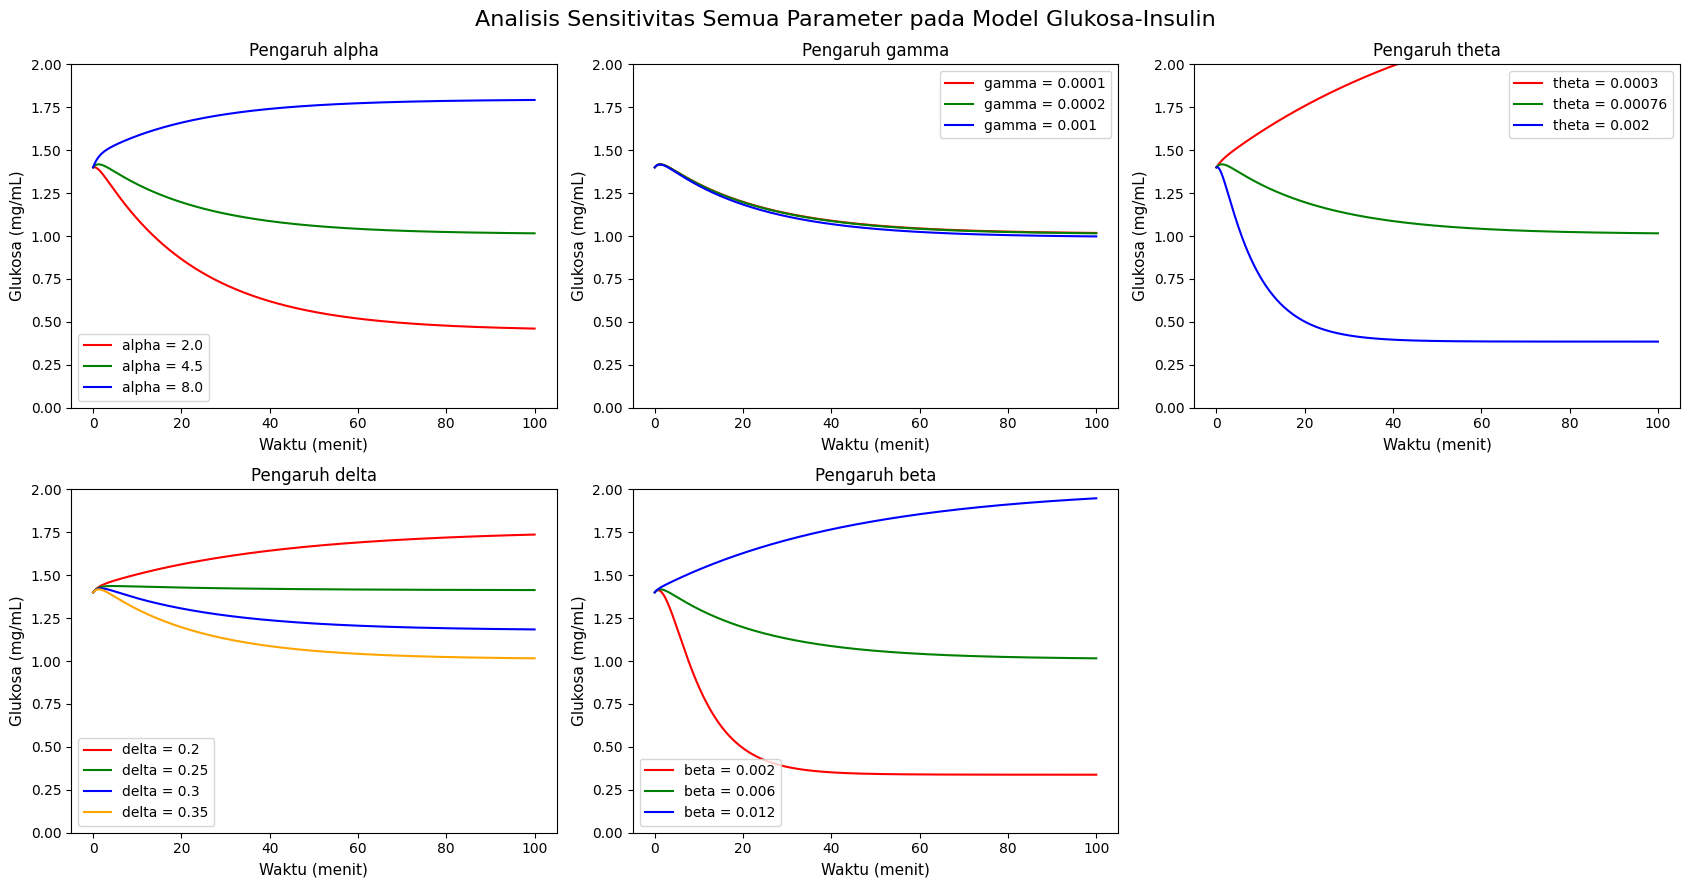

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = delta * G - beta * I * G
    return np.array([dGdt, dIdt])

def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Default parameter
alpha = 4.5
gamma = 0.0002
theta = 0.00076
delta = 0.35
beta = 0.006

t = np.linspace(0, 100, 3000)
z0 = [140.0, 10.0]

param_ranges = {
    'alpha': [2.0, 4.5, 8.0],
    'gamma': [0.0001, 0.0002, 0.001],
    'theta': [0.0003, 0.00076, 0.002],
    'delta': [0.2, 0.25, 0.3, 0.35],
    'beta': [0.002, 0.006, 0.012],
}

# Gunakan cukup warna untuk semua variasi
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']

fig, axs = plt.subplots(2, 3, figsize=(17, 9))
axs = axs.flatten()

for idx, (param, values) in enumerate(param_ranges.items()):
    for i, val in enumerate(values):
        alpha_i = val if param == 'alpha' else alpha
        gamma_i = val if param == 'gamma' else gamma
        theta_i = val if param == 'theta' else theta
        delta_i = val if param == 'delta' else delta
        beta_i  = val if param == 'beta'  else beta

        params = (alpha_i, gamma_i, theta_i, delta_i, beta_i)
        solution = runge_kutta_4(f, z0, t, params)
        glucose = solution[:, 0] / 100

        axs[idx].plot(t, glucose, color=colors[i % len(colors)], label=f"{param} = {val}")

    axs[idx].set_title(f"Pengaruh {param}", fontsize=12)
    axs[idx].set_xlabel('Waktu (menit)', fontsize=11)
    axs[idx].set_ylabel('Glukosa (mg/mL)', fontsize=11)
    axs[idx].set_ylim(0, 2)
    axs[idx].legend()

# Kosongkan plot terakhir jika subplot lebih banyak
if len(axs) > len(param_ranges):
    for j in range(len(param_ranges), len(axs)):
        fig.delaxes(axs[j])

fig.suptitle('Analisis Sensitivitas Semua Parameter pada Model Glukosa-Insulin', fontsize=16)
plt.tight_layout()
plt.show()


analisis DM1

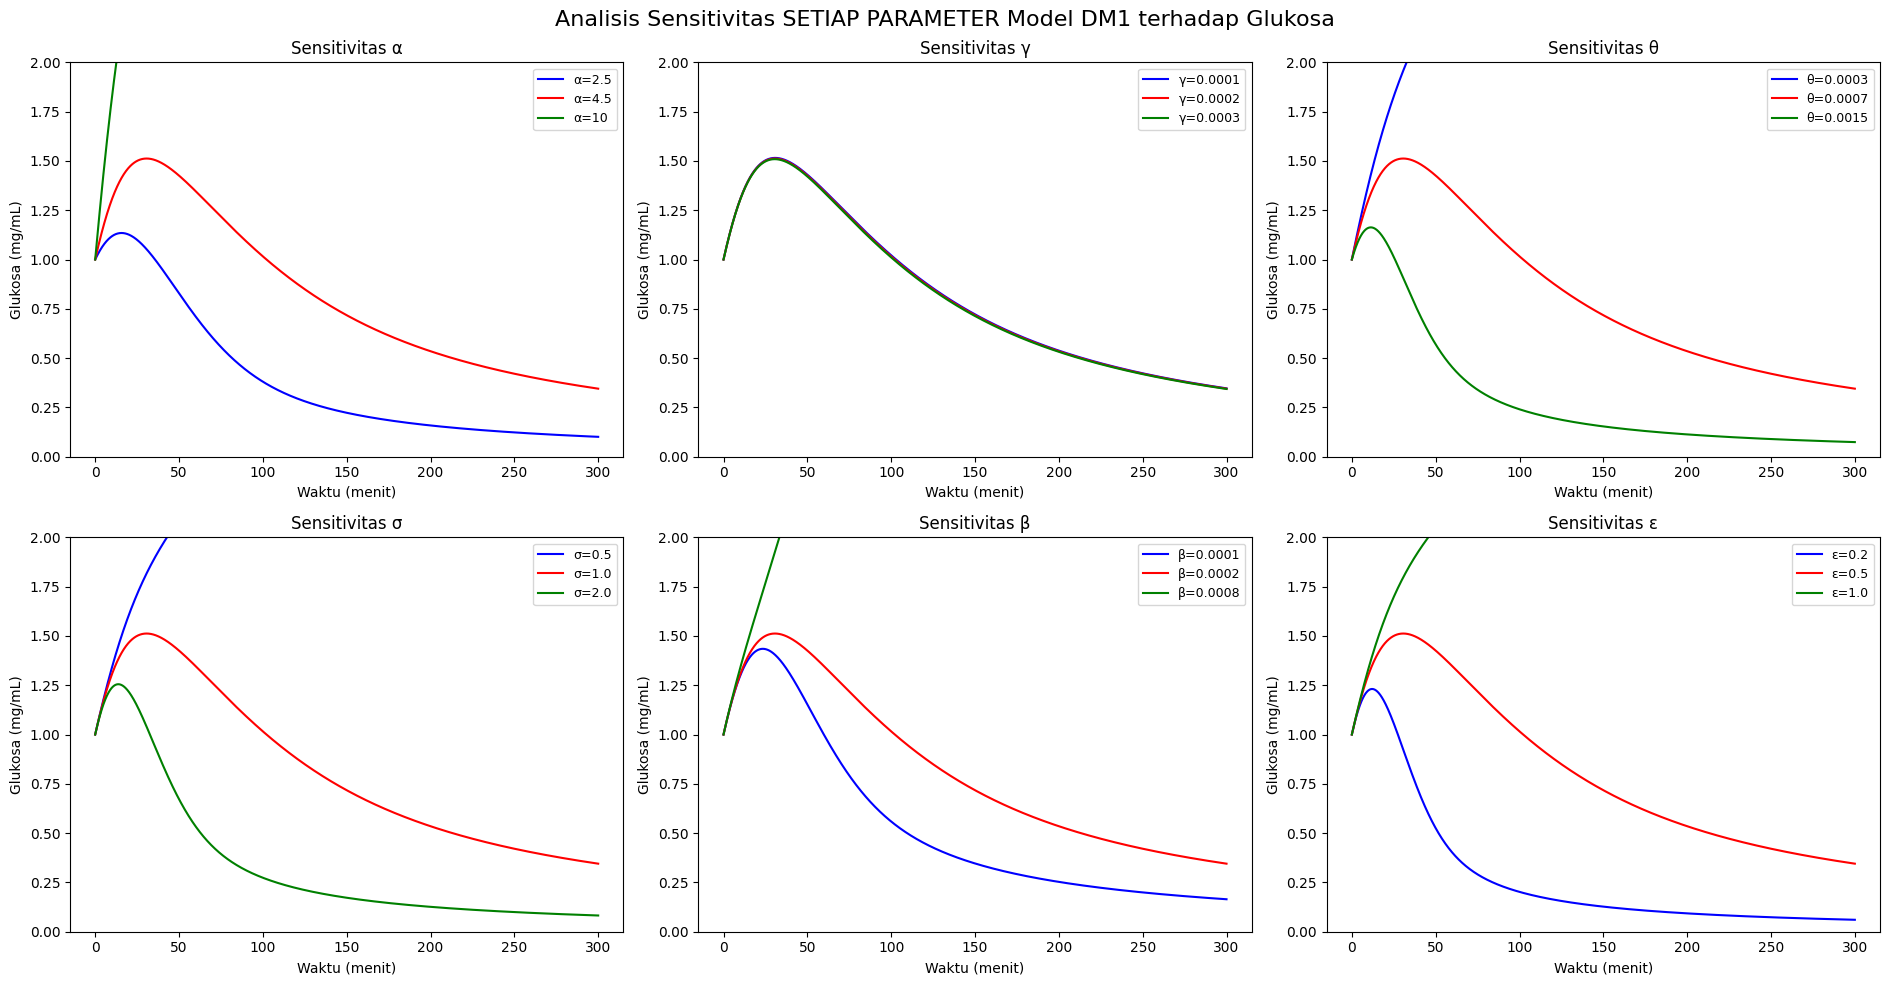

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa-insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter "default" (diambil dari rentang biologis DM1, bisa Anda modifikasi!)
alpha   = 4.5
gamma   = 0.0002
theta   = 0.0007
sigma   = 1.0
beta    = 0.0002
epsilon = 0.5

t = np.linspace(0, 300, 3000)
z0 = [100.0, 10.0]

# RANGEs sensitivitas tiap parameter (rendah, default, tinggi)
ranges = {
    "alpha":   [2.5, 4.5, 10],
    "gamma":   [0.0001, 0.0002, 0.0003],
    "theta":   [0.0003, 0.0007, 0.0015],
    "sigma":   [0.5, 1.0, 2.0],
    "beta":    [0.0001, 0.0002, 0.0008],
    "epsilon": [0.2, 0.5, 1.0]
}
labels = {"alpha":"α", "gamma":"γ", "theta":"θ", "sigma":"σ", "beta":"β", "epsilon":"ε"}
colors = ["blue", "red", "green"]

fig, axes = plt.subplots(2, 3, figsize=(19, 10))
axes = axes.flatten()

for i, (param, vals) in enumerate(ranges.items()):
    ax = axes[i]
    for j, v in enumerate(vals):
        # Copy parameter default, ganti hanya satu
        p = {
            "alpha": alpha,
            "gamma": gamma,
            "theta": theta,
            "sigma": sigma,
            "beta":  beta,
            "epsilon": epsilon
        }
        p[param] = v
        sol = runge_kutta_4(glucose_insulin_system, z0, t, tuple(p.values()))
        glucose = sol[:,0]/100
        insulin = sol[:,1]
        # Bisa pilih plot glucose, insulin, atau keduanya overlay
        ax.plot(t, glucose, color=colors[j], label=f'{labels[param]}={v}')
    ax.set_title(f"Sensitivitas {labels[param]}")
    ax.set_xlabel("Waktu (menit)")
    ax.set_ylabel("Glukosa (mg/mL)")
    ax.set_ylim(0, 2)
    ax.legend(fontsize=9)

fig.suptitle("Analisis Sensitivitas SETIAP PARAMETER Model DM1 terhadap Glukosa", fontsize=16)
plt.tight_layout()
plt.show()

# Untuk insulin, ulangi dengan insulin saja (atau overlay di tiap subplot!)


analisis dampak sigma epsilon

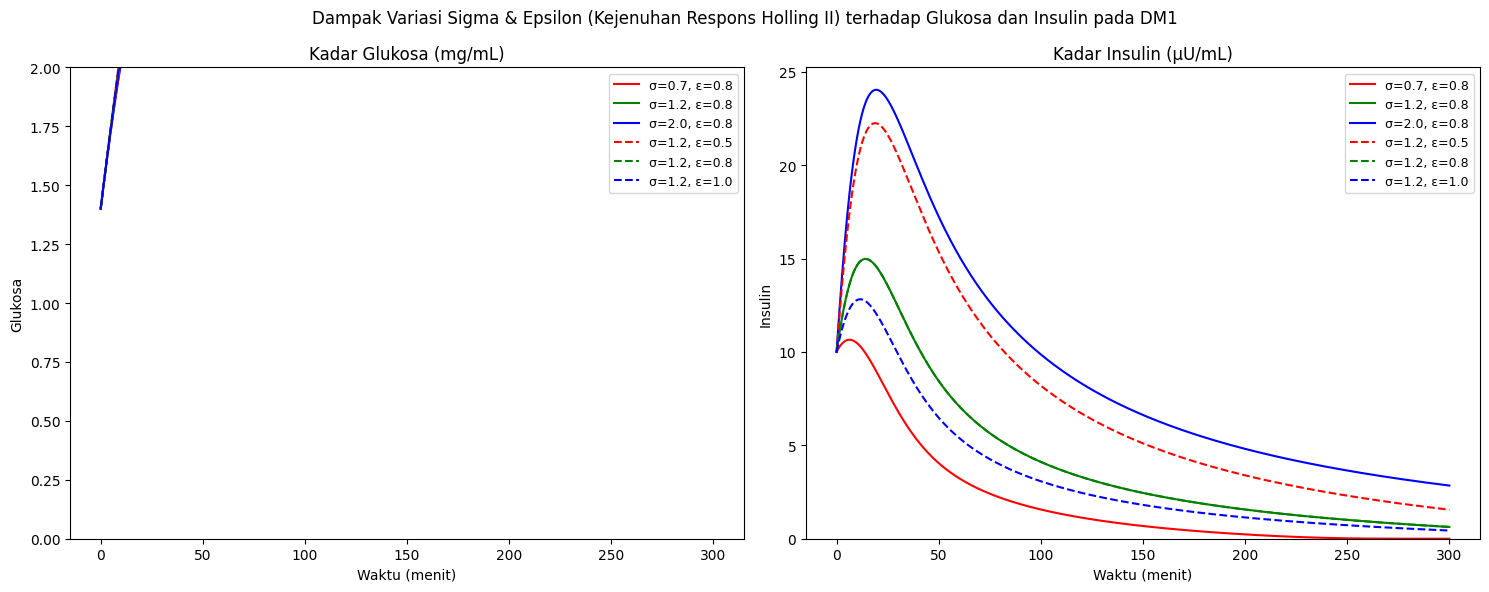

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin dengan Holling II response
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Runge-Kutta 4 untuk ODE
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# PARAMETER DASAR
alpha = 8             # mg/(dL×min), laju masuk glukosa
gamma = 0.0002        # 1/min, konsumsi basal glukosa
theta = 0.0006        # 1/(μU×mL×min), sensitivitas insulin
beta = 0.0004         # μU/(mL×min), clearance insulin
# Kita akan variasikan sigma dan epsilon (efek respon Holling II)

t = np.linspace(0, 300, 3000)
z0 = [140.0, 10.0]    # G (mg/dL), I (μU/mL)

# VARIASI PARAMETER
sigma_values = [0.7, 1.2, 2.0]  # Rendah, sedang, tinggi
epsilon_values = [0.5, 0.8, 1.0] # Rendah (= lemah jenuh), sedang, tinggi (cepat jenuh)
colors = ['red', 'green', 'blue']

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axg, axi = axs

for i, sigma in enumerate(sigma_values):
    # Untuk setiap sigma, pakai epsilon sedang
    params = (alpha, gamma, theta, sigma, beta, 0.8)
    sol = runge_kutta_4(glucose_insulin_system, z0, t, params)
    glucose = sol[:, 0] / 100
    insulin = sol[:, 1]
    axg.plot(t, glucose, color=colors[i], label=f"σ={sigma}, ε=0.8")
    axi.plot(t, insulin, color=colors[i], label=f"σ={sigma}, ε=0.8")

for i, epsilon in enumerate(epsilon_values):
    # Untuk setiap epsilon, pakai sigma sedang
    params = (alpha, gamma, theta, 1.2, beta, epsilon)
    sol = runge_kutta_4(glucose_insulin_system, z0, t, params)
    glucose = sol[:, 0] / 100
    insulin = sol[:, 1]
    axg.plot(t, glucose, color=colors[i], linestyle='dashed', label=f"σ=1.2, ε={epsilon}")
    axi.plot(t, insulin, color=colors[i], linestyle='dashed', label=f"σ=1.2, ε={epsilon}")

axg.set_title('Kadar Glukosa (mg/mL)')
axg.set_xlabel('Waktu (menit)')
axg.set_ylabel('Glukosa')
axg.legend(fontsize=9)
axg.set_ylim(0, 2)

axi.set_title('Kadar Insulin (μU/mL)')
axi.set_xlabel('Waktu (menit)')
axi.set_ylabel('Insulin')
axi.legend(fontsize=9)
axi.set_ylim(0, )

plt.suptitle("Dampak Variasi Sigma & Epsilon (Kejenuhan Respons Holling II) terhadap Glukosa dan Insulin pada DM1")
plt.tight_layout()
plt.show()
